  
**AGERNG** = Age Range 
**GENDER** = Gender
**EDU** = Education  
**PROF** = Profession  
**MARSTS** = Marital Status  
**LIVWTH** = Living with Parents  
**ENVSAT** = Satisfaction from enviroment 
**POSSAT** = Satisfaction from assets (money etc)   
**FINSTR** = Fİnancial Stress  
**DEBT** = Debt  
**PHYEX** = Workout 
**SMOKE** = Cigarette
**DRINK** = Alcohol  
**ILLNESS** = Sickness  
**PREMED** = Pre medical condition  
**AVGSLP** = Average Sleeping  
**INSOM** = Insomnia  
**TSSN** = Daily social media time  
**WRKPRE** = Workplace preassure  
**ANXI** = Anxiety  
**DEPRI** = Depression symptoms  
**ABUSED** = ABUSED 
**CHEAT** = is cheated  
**THREAT** = Threatened  
**SUICIDE** = Suicidal  
**INFER** = Lack of self confidence  
**CONFLICT** = Conflict with partner  
**LOST** = Lose someone who is close with or money/opportunity  

In [208]:
#Preprocess
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import plotly.express as px
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, matthews_corrcoef

In [209]:
Depression = pd.read_csv(r"C:\Users\Van_P\OneDrive\Masaüstü\Projects\Deep Learning\Depression\Depression.csv",delimiter=',',encoding='iso-8859-1',dtype={'model':str,'transmission':str,'fuelType':str})

with pd.option_context('display.max_columns', None):
    display(Depression)

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,DEBT,PHYEX,SMOKE,DRINK,ILLNESS,PREMED,EATDIS,AVGSLP,INSOM,TSSN,WRKPRE,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,Female,Post Graduate,Unemployed,Unmarried,Town,With Family,Yes,Yes,No,No,Sometimes,No,Yes,No,No,No,More than 8 hours,No,2-4 hours a day,No Pressure,Yes,No,No,No,No,No,No,Yes,No,0
1,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,Yes,No,Yes,No,Never,No,No,No,No,No,6 hours,Yes,5-7 hours a day,Moderate,Yes,Yes,Yes,No,No,No,Yes,No,No,1
2,21-25,Male,HSC,Student,Unmarried,City,With Family,Yes,Yes,No,No,Never,No,No,No,No,No,8 hours,No,8-10 hours a day,Mild,Yes,Yes,No,No,No,No,No,No,No,0
3,16-20,Male,HSC,Student,Unmarried,City,With Family,No,Yes,No,No,Sometimes,No,No,No,No,No,7 hours,No,2-4 hours a day,Severe,Yes,Yes,No,Yes,No,No,No,No,No,1
4,21-25,Male,Graduate,Student,Unmarried,Town,With Family,No,Yes,Yes,No,Never,No,No,No,Yes,No,7 hours,Yes,5-7 hours a day,Mild,Yes,Yes,No,No,No,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,26-30,Male,Graduate,Service holder (Private),Unmarried,City,With Family,No,Yes,Yes,No,Sometimes,No,No,No,No,No,8 hours,Yes,8-10 hours a day,No Pressure,No,Yes,No,No,No,No,No,No,Yes,1
600,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,No,No,Yes,Yes,Sometimes,No,No,No,No,No,7 hours,No,2-4 hours a day,Severe,Yes,Yes,Yes,No,No,No,Yes,No,No,1
601,21-25,Male,Graduate,Student,Married,Village,With Family,No,No,Yes,No,Never,Yes,No,No,No,No,5 hours,No,5-7 hours a day,Mild,Yes,No,No,No,No,No,No,No,No,1
602,21-25,Male,Graduate,Other,Unmarried,City,With Family,Yes,Yes,No,No,Sometimes,No,No,No,No,No,7 hours,No,2-4 hours a day,Moderate,Yes,No,No,No,No,No,Yes,No,No,0


In [210]:
def plot_category_value_counts(column):
    counts = Depression[column].value_counts().sort_values(ascending=False)
    
    fig = px.bar(
        x=counts.index.astype(str),
        y=counts.values,
        labels={'x': column, 'y': 'Count'},
        title=f"Value Counts for '{column}'"
    )
    
    fig.update_traces(
        hovertemplate=f"<b>{column}</b>: %{{x}}<br><b>Count</b>: %{{y}}<extra></extra>"
    )
    
    fig.update_layout(
        width=600,
        height=500,
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            showline=True,
            linecolor='black',
            linewidth=2,
            mirror=True
        ),
        yaxis=dict(
            showline=True,
            linecolor='black',
            linewidth=1,
            mirror=True,
            gridcolor='black',      
            gridwidth=1,             
            tickmode='linear',       
            dtick=50                 
        )
    )

    fig.show()

@widgets.interact(column=Depression.columns.tolist())
def show_value_counts(column):
    plot_category_value_counts(column)


interactive(children=(Dropdown(description='column', options=('AGERNG', 'GENDER', 'EDU', 'PROF', 'MARSTS', 'RE…

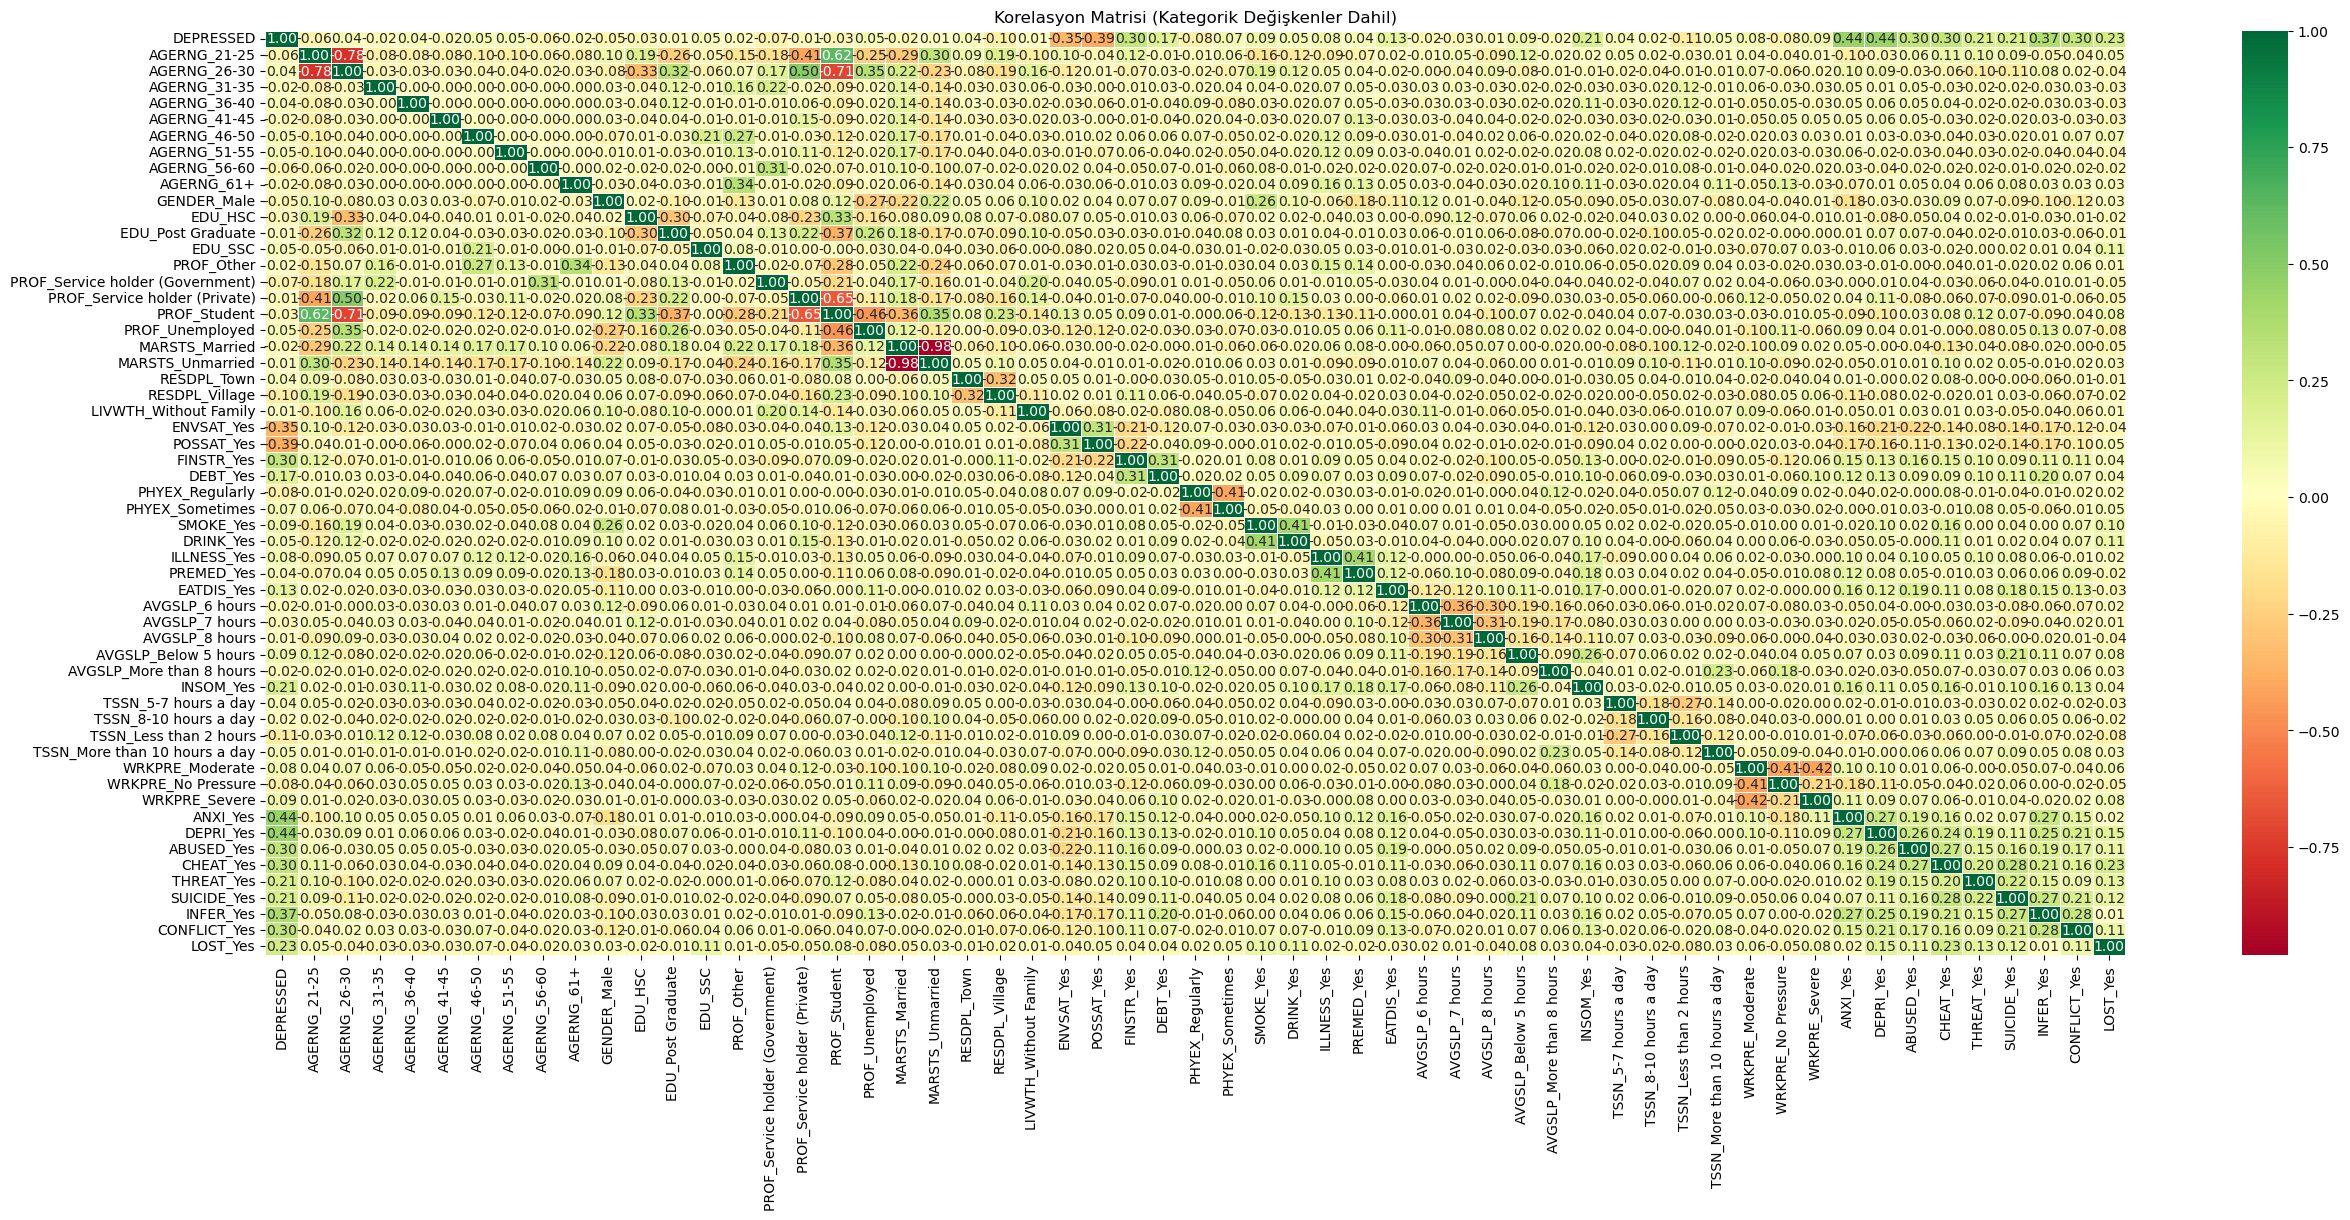

In [211]:
Depression_encoded = pd.get_dummies(Depression, drop_first=True)

#Heatmap
correlation_matrix = Depression_encoded.corr()
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Korelasyon Matrisi (Kategorik Değişkenler Dahil)")
plt.show()


In [212]:
def plot_depression_percentage_by_feature(column):
    # Calculate % and counts
    crosstab_percent = pd.crosstab(Depression[column], Depression["DEPRESSED"], normalize='index') * 100
    crosstab_percent = crosstab_percent.rename(columns={0: "Not Depressed", 1: "Depressed"})
    crosstab_count = pd.crosstab(Depression[column], Depression["DEPRESSED"])
    categories = crosstab_percent.index.tolist()
    depressed_counts = crosstab_count[1].reindex(categories).fillna(0).astype(int).tolist()
    not_depressed_counts = crosstab_count[0].reindex(categories).fillna(0).astype(int).tolist()
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=categories,
        y=crosstab_percent["Not Depressed"],
        name='Not Depressed',
        marker_color='green',
        customdata=[(val,) for val in not_depressed_counts],
        hovertemplate="<b>%{x}</b><br>Not Depressed: %{y:.1f}%<br>Count: %{customdata[0]}<extra></extra>",
    ))

    fig.add_trace(go.Bar(
        x=categories,
        y=crosstab_percent["Depressed"],
        name='Depressed',
        marker_color='red',
        customdata=[(val,) for val in depressed_counts],
        hovertemplate="<b>%{x}</b><br>Depressed: %{y:.1f}%<br>Count: %{customdata[0]}<extra></extra>"
    ))
    
    fig.update_layout(
        legend=dict(
        orientation='h',  # horizontal
        yanchor='bottom',
        y=-0.2,
        xanchor='center',
        x=0.5),
        width=600,
        height=500,
        barmode='stack',
        title=f"Depression Rate by '{column}'",
        xaxis_title=column,
        yaxis_title="Percentage",
        yaxis=dict(ticksuffix="%", range=[0, 100]),
        plot_bgcolor='white',
        paper_bgcolor='white',
    )

    fig.show()

feature_dropdown = widgets.Dropdown(
    options=[col for col in Depression.columns if col != "DEPRESSED"],
    description="Column:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='10%')
)

interactive_plot = widgets.interactive(plot_depression_percentage_by_feature, column=feature_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Column:', layout=Layout(width='10%'), options=('AGERNG', 'GENDER',…

In [213]:
def plot_grouped_bar(x_column, color_column, filter_data):
    if x_column == color_column:
        print("X-axis and comparison feature must be different.")
        return

    df = Depression.copy()
    if filter_data:
        df = df[df["DEPRESSED"] == 1]

    # Count and percentage
    count_df = df.groupby([x_column, color_column]).size().reset_index(name='count')
    count_df['percentage'] = count_df['count'] / count_df.groupby(x_column)['count'].transform('sum') * 100
    customdata=[color_column, 'count', 'percentage'],


    # Graph
    fig = px.bar(
        count_df,
        x=x_column,
        y="count",
        text_auto=True,
        color=color_column,
        barmode='group',
        custom_data=[color_column, 'count', 'percentage'],
        labels={x_column: x_column, color_column: color_column, "count": "Count"},
        title=f"{x_column} distribution grouped by {color_column}" + (" (Only Depressed)" if filter_data else "")
    )

    fig.update_traces(
        hovertemplate=(
            "<b>%{x}</b><br>" +
            f"{color_column}: %{customdata[0]}<br>" +
            "Count: %{customdata[1]}<br>" +
            "Percentage: %{customdata[2]:.1f}%<extra></extra>"
        )
    )

    fig.update_layout(
        height=500,
        width=1000,
        xaxis_title=x_column,
        yaxis_title="Count",
        bargap=0.15,
        plot_bgcolor='white',
        paper_bgcolor='white',
        legend_title=color_column
    )

    fig.show()


# UI layout and interactive display
ui = widgets.VBox([
    widgets.HBox([x_selector, color_selector]),
    filter_checkbox
])

out = widgets.interactive_output(
    plot_grouped_bar,
    {
        'x_column': x_selector,
        'color_column': color_selector,
        'filter_data': filter_checkbox
    }
)

display(ui, out)

Output()

In [214]:
# Chi2 test. If p < 0.05 very strong relation, 0.05 < p <0.1 considerable., 0.1 nope
chi2_results = []

for col in Depression.columns:
    if col != "DEPRESSED":  
        contingency_table = pd.crosstab(Depression["DEPRESSED"], Depression[col])  
        chi2, p, dof, expected = chi2_contingency(contingency_table) 
        chi2_results.append((col, p))
chi2_results = sorted(chi2_results, key=lambda x: x[1])

print("Relationship between target and feature:")
for col, p_val in chi2_results:
    print(f"{col}: p = {p_val:.5f}")


Relationship between target and feature:
ANXI: p = 0.00000
DEPRI: p = 0.00000
POSSAT: p = 0.00000
INFER: p = 0.00000
ENVSAT: p = 0.00000
CHEAT: p = 0.00000
ABUSED: p = 0.00000
CONFLICT: p = 0.00000
FINSTR: p = 0.00000
LOST: p = 0.00000
SUICIDE: p = 0.00000
INSOM: p = 0.00000
THREAT: p = 0.00000
DEBT: p = 0.00004
WRKPRE: p = 0.00165
EATDIS: p = 0.00183
SMOKE: p = 0.03986
RESDPL: p = 0.06022
TSSN: p = 0.06593
ILLNESS: p = 0.08647
PHYEX: p = 0.09825
PROF: p = 0.17940
DRINK: p = 0.23769
GENDER: p = 0.26845
PREMED: p = 0.34456
AVGSLP: p = 0.35604
MARSTS: p = 0.40270
AGERNG: p = 0.49755
EDU: p = 0.61294
LIVWTH: p = 0.80592


In [215]:
# Vif analysis <5 okay, 5-10 accaptable, >10 either strong relation with other features or repating the info

df_vif = pd.get_dummies(Depression, drop_first=True)
df_vif = df_vif.astype(int)
df_vif.replace([np.inf, -np.inf], np.nan, inplace=True)  
df_vif.dropna(inplace=True)  

#Vif
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

#Result
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("VIF Results:")
print(vif_data)

VIF Results:
                             Feature        VIF
20                  MARSTS_Unmarried  76.243125
17                      PROF_Student  46.211131
19                    MARSTS_Married  13.608331
1                       AGERNG_21-25  10.595945
16     PROF_Service holder (Private)   9.077899
2                       AGERNG_26-30   6.725201
0                          DEPRESSED   6.510438
10                       GENDER_Male   5.928316
18                   PROF_Unemployed   5.516728
24                        ENVSAT_Yes   4.880532
36                    AVGSLP_7 hours   4.075564
29                   PHYEX_Sometimes   4.067748
35                    AVGSLP_6 hours   4.010655
48                          ANXI_Yes   3.827243
45                   WRKPRE_Moderate   3.703315
26                        FINSTR_Yes   3.651830
37                    AVGSLP_8 hours   3.362357
14                        PROF_Other   2.893742
25                        POSSAT_Yes   2.772131
49                         

### Encoding + Test train Split

In [226]:
Depression=Depression.drop(columns=['MARSTS'])
categorical_columns = [col for col in Depression.select_dtypes(include=['object']).columns if col != "DEPRESSED"]
onhe = OneHotEncoder(drop="if_binary", sparse_output=False, handle_unknown="ignore")
enco = onhe.fit_transform(Depression[categorical_columns])
enco_columns = onhe.get_feature_names_out(categorical_columns)
enco_df = pd.DataFrame(enco, columns=enco_columns)
Depression_encoded = pd.concat([Depression.reset_index(drop=True), enco_df], axis=1)
Depression_encoded = Depression_encoded.drop(columns=categorical_columns)
Depression_encoded.head(15)

,DEPRESSED,AGERNG_16-20,AGERNG_21-25,AGERNG_26-30,AGERNG_31-35,AGERNG_36-40,AGERNG_41-45,AGERNG_46-50,AGERNG_51-55,AGERNG_56-60,...,WRKPRE_Severe,ANXI_Yes,DEPRI_Yes,ABUSED_Yes,CHEAT_Yes,THREAT_Yes,SUICIDE_Yes,INFER_Yes,CONFLICT_Yes,LOST_Yes
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [227]:
X=Depression_encoded.drop(columns=['DEPRESSED'])
y=Depression_encoded['DEPRESSED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Models

,Metric,Value
0,Accuracy,0.884615
1,Precision,0.907563
2,F1-Score,0.911392
3,MCC,0.746101


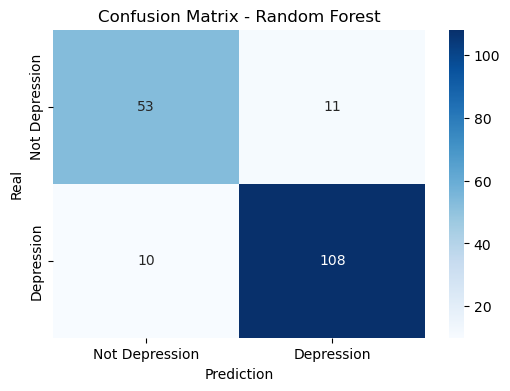

Cross Validation Scores: [0.91743119 0.94827586 0.85185185 0.89090909 0.90909091]
Mean: 0.9035117813162735 Std: 0.03180023811954477


In [218]:
#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,min_samples_split= 5,min_samples_leaf=2,max_features='log2',max_depth=20,class_weight='balanced',bootstrap=True, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "F1-Score", "MCC"],
    "Value": [accuracy_rf, precision_rf, f1_rf, mcc_rf]
})

display(metrics_df)

#Confusion
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depression", "Depression"], yticklabels=["Not Depression", "Depression"])
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix - Random Forest")
plt.show()

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="f1")

print(f"Cross Validation Scores: {cv_scores}")
print("Mean:", cv_scores.mean(), "Std:", cv_scores.std())

In [42]:
param_dist = {
    "n_estimators": [50, 100, 200, 300, 400, 500],
    "max_depth": [5, 10, 15, 20, 30, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
    "class_weight": ["balanced", "balanced_subsample", None]
}
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist,
    n_iter=250,
    scoring=["f1", "accuracy", "precision", "recall", "roc_auc", "neg_log_loss"],
    refit="f1", 
    cv=5, 
    verbose=1,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("En İyi Parametreler:", random_search.best_params_)
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

metrics_dict = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Log Loss", "MCC"],
    "Value": [
        accuracy_score(y_test, y_pred_best_rf),
        precision_score(y_test, y_pred_best_rf),
        recall_score(y_test, y_pred_best_rf),
        f1_score(y_test, y_pred_best_rf),
        roc_auc_score(y_test, y_pred_best_rf),
        log_loss(y_test, y_pred_best_rf),
        matthews_corrcoef(y_test, y_pred_best_rf)
    ]
}

metrics_df = pd.DataFrame(metrics_dict)
display(metrics_df)


Fitting 5 folds for each of 250 candidates, totalling 1250 fits
En İyi Parametreler: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': True}


,Metric,Value
0,Accuracy,0.890000
1,Precision,0.929134
2,Recall,0.900763
3,F1-Score,0.914729
4,AUC-ROC,0.885164
5,Log Loss,3.964802
6,MCC,0.760629


#### XGBoost

,Metric,Value
0,Accuracy,0.895604
1,Precision,0.909091
2,Recall,0.932203
3,F1-Score,0.920502
4,AUC-ROC,0.880164
5,Log Loss,3.762799
6,MCC,0.769085


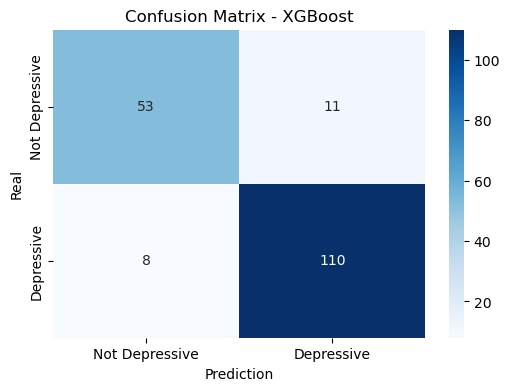

Cross Validation Scores: [0.91743119 0.89256198 0.86956522 0.9009009  0.90434783]
Mean: 0.8969614241021573 Std: 0.015868188658906705


In [219]:
#XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=250, 
    learning_rate=0.06,  
    max_depth=6,  
    subsample=0.6,  
    colsample_bytree=0.6,
    gamma=2,
    scale_pos_weight=1,
    reg_alpha=0.01,
    reg_lambda=10
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


metrics_dict_xgb = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Log Loss", "MCC"],
    "Value": [
        accuracy_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_xgb),
        roc_auc_score(y_test, y_pred_xgb),
        log_loss(y_test, y_pred_xgb),
        matthews_corrcoef(y_test, y_pred_xgb)
    ]
}


metrics_df_xgb = pd.DataFrame(metrics_dict_xgb)
display(metrics_df_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depressive", "Depressive"], yticklabels=["Not Depressive", "Depressive"])
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix - XGBoost")
plt.show()

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="f1")

print(f"Cross Validation Scores: {cv_scores}")
print("Mean:", cv_scores.mean(), "Std:", cv_scores.std())

In [95]:
# Parameters
param_dist = {
    "n_estimators": list(range(50, 501, 50)),
    "max_depth": list(range(3, 21, 3)),
    "learning_rate": np.round(np.arange(0.01, 0.31, 0.05), 2).tolist(),
    "subsample": np.round(np.arange(0.6, 1.01, 0.2), 2).tolist(),    
    "colsample_bytree": np.round(np.arange(0.6, 1.01, 0.2), 2).tolist(),
    "gamma": list(range(0, 11, 2)),     
    "scale_pos_weight": list(range(1, 11, 2)),
    "reg_alpha": [0, 0.01, 0.1, 0.5, 1, 2],
    "reg_lambda": [0.1, 0.5, 1, 3, 5, 10]
}


# Model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Random Search CV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=300,
    scoring=["f1", "accuracy", "precision", "recall", "roc_auc", "neg_log_loss"],
    refit="f1",
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
best_xgb = random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Metrics
metrics_dict = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Log Loss", "MCC"],
    "Value": [
        accuracy_score(y_test, y_pred_best_xgb),
        precision_score(y_test, y_pred_best_xgb),
        recall_score(y_test, y_pred_best_xgb),
        f1_score(y_test, y_pred_best_xgb),
        roc_auc_score(y_test, y_pred_best_xgb),
        log_loss(y_test, y_pred_best_xgb),
        matthews_corrcoef(y_test, y_pred_best_xgb)
    ]
}

metrics_df = pd.DataFrame(metrics_dict)
display(metrics_df)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 1, 'reg_lambda': 10, 'reg_alpha': 0.01, 'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.06, 'gamma': 2, 'colsample_bytree': 0.6}


C:\Users\Van_P\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast

C:\Users\Van_P\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[21:06:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




,Metric,Value
0,Accuracy,0.895604
1,Precision,0.909091
2,Recall,0.932203
3,F1-Score,0.920502
4,AUC-ROC,0.880164
5,Log Loss,3.762799
6,MCC,0.769085


In [220]:
#Second overfit check
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
def scores(y_true, y_pred, label):
    print(f"--- {label} Scores ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))
    print()

scores(y_train, y_train_pred, "Train")
scores(y_test, y_test_pred, "Test")

--- Train Scores ---
Accuracy : 0.8933649289099526
Precision: 0.9090909090909091
Recall   : 0.931899641577061
F1-Score : 0.9203539823008849

--- Test Scores ---
Accuracy : 0.8956043956043956
Precision: 0.9090909090909091
Recall   : 0.9322033898305084
F1-Score : 0.9205020920502092



#### Neural Network

In [229]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def build_custom_model(
    input_dim=62,
    hidden_units_1=64,
    hidden_units_2=16,
    dropout_1=0.2,
    dropout_2=0.1,
    activation='relu',
    optimizer='adam',
    learning_rate=None
):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(hidden_units_1, activation=activation))
    model.add(Dropout(dropout_1))
    model.add(Dense(hidden_units_2, activation=activation))
    model.add(Dropout(dropout_2))
    model.add(Dense(1, activation='sigmoid'))  # for binary classification

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['F1Score','Accuracy']
    )
    return model

# EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True,
    mode='min'
)

# KerasClassifier Wrapper
clf = KerasClassifier(
    model=build_custom_model,
    model__input_dim=X_train.shape[1],
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)


In [222]:
history=clf.fit(X_train2, y_train2, validation_data=(X_val, y_val))
y_pred_prob = clf.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
metrics_dict_keras = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Log Loss", "MCC"],
    "Value": [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred),
        log_loss(y_test, y_pred),
        matthews_corrcoef(y_test, y_pred)
    ]
}

metrics_df_keras = pd.DataFrame(metrics_dict_keras)
display(metrics_df_keras)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - Accuracy: 0.5974 - F1Score: 0.8145 - loss: 0.6495 - val_Accuracy: 0.6118 - val_F1Score: 0.7591 - val_loss: 0.6180
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.6746 - F1Score: 0.8114 - loss: 0.5713 - val_Accuracy: 0.6118 - val_F1Score: 0.7591 - val_loss: 0.5879
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.6591 - F1Score: 0.7868 - loss: 0.5516 - val_Accuracy: 0.6471 - val_F1Score: 0.7591 - val_loss: 0.5530
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Accuracy: 0.7144 - F1Score: 0.8096 - loss: 0.5037 - val_Accuracy: 0.6706 - val_F1Score: 0.7591 - val_loss: 0.5204
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.7201 - F1Score: 0.8211 - loss: 0.4740 - val_Accuracy: 0.7059 - val_F1Score: 0.7591 - val_loss: 0.4875
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Accuracy: 0.7863 - F1Score: 0.8180 - loss: 0.4349 - val_Accuracy: 0.8000 - val_F1Score: 0.7591 - val_loss: 0.4548
Epo

,Metric,Value
0,Accuracy,0.895604
1,Precision,0.923077
2,Recall,0.915254
3,F1-Score,0.919149
4,AUC-ROC,0.887315
5,Log Loss,3.762799
6,MCC,0.771925


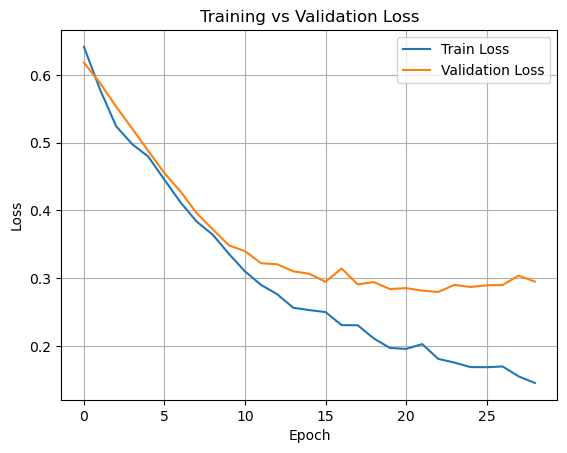

In [223]:
plt.plot(history.history_['loss'], label='Train Loss')
plt.plot(history.history_['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [224]:
clf = KerasClassifier(
    model=build_custom_model,
    model__input_dim=X_train.shape[1],
    epochs=50,
    batch_size=32,
    verbose=0
)

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# F1 score
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="f1")

print("F1 Score:", scores)
print("Mean:", scores.mean())
print("Std:", scores.std())


F1 Score: [0.91743119 0.9375     0.9245283  0.85714286 0.88695652]
Mean: 0.904711774685866
Std: 0.029008953743926535


### Stacking

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Metric,Value
0,Accuracy,0.906593
1,Precision,0.917355
2,Recall,0.940678
3,F1-Score,0.928870
4,AUC-ROC,0.892214
5,Log Loss,3.366715
6,MCC,0.793463


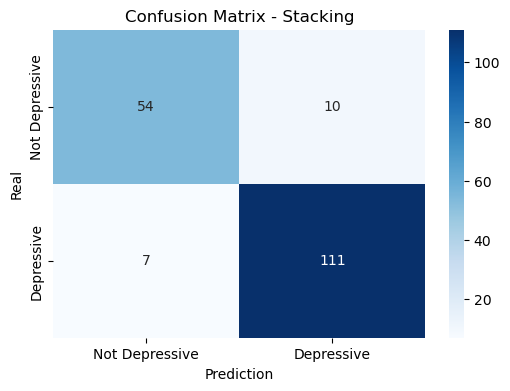

In [230]:
# Base Models
estimators = [
    ("rf", rf_model),
    ("xgb", xgb_model),
    ("nn", clf) 
]

# Main Model
final_estimator = LogisticRegression(max_iter=1000)

# StackingClassifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)


stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

metrics_dict_stack = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Log Loss", "MCC"],
    "Value": [
        accuracy_score(y_test, y_pred_stack),
        precision_score(y_test, y_pred_stack),
        recall_score(y_test, y_pred_stack),
        f1_score(y_test, y_pred_stack),
        roc_auc_score(y_test, y_pred_stack),
        log_loss(y_test, y_pred_stack),
        matthews_corrcoef(y_test, y_pred_stack)
    ]
}

metrics_final = pd.DataFrame(metrics_dict_stack)
display(metrics_final)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depressive", "Depressive"], yticklabels=["Not Depressive", "Depressive"])
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix - Stacking")
plt.show()